## Математические методы анализа в биологии и медицине

**Программа курса:**

* Введение: Применение математических расчетов в биологии, медицине, фармакологии

* Линейная алгебра

* Функция одной переменной и ее свойства

* Производная и дифференциалы.

* Функции нескольких переменных

* Первообразная, неопределенный интеграл. Определенный интеграл

* **Дифференциальные уравнения**

* Дифференциальные уравнения 2-го и высших порядков.

* Моделирования физико-химических процессов. Системы дифференциальных уравнений. Численные методы.


Понятия порядка дифференциального уравнения. 
Однородные дифференциальные уравнения. Задача Коши.
Неоднородные дифференциальные уравнения.
Линейные дифференциальные уравнения первого порядка.
Линейные дифференциальные уравнения второго порядка.
Система дифференциальных уравнений.
Метод Эйлера.
Уравнение кинетики первого порядка при IV введении.
Уравнение кинетики первого порядка при всасывании из ЖКТ (однокомпартментная модель).
Уравнение Михаэлиса-Ментен.

* Julia: https://docs.julialang.org/en/v1/manual/getting-started/
* ForwardDiff: https://juliadiff.org/ForwardDiff.jl/stable/
* Plots: https://docs.juliaplots.org/stable/
* Distributions: https://juliastats.org/Distributions.jl/stable/
* QuadGK: https://juliamath.github.io/QuadGK.jl/stable/
* SymbolicNumericIntegration: https://github.com/SciML/SymbolicNumericIntegration.jl
* Symbolics: https://github.com/JuliaSymbolics/Symbolics.jl
* DifferentialEquations: https://github.com/SciML/DifferentialEquations.jl
* Sundials: https://github.com/SciML/Sundials.jl


**Пример символьного интегрирования:**

In [1]:
using Symbolics, SymbolicNumericIntegration, QuadGK

@variables x
sf, a, b = integrate(3x^3 + 2x - 5)

(x^2 + (3//4)*(x^4) - 5x, 0, 0)

In [2]:
bf = build_function(sf, x)

:(function (x,)
      #= C:\Users\vsarn\.julia\packages\SymbolicUtils\NJ0fs\src\code.jl:373 =#
      #= C:\Users\vsarn\.julia\packages\SymbolicUtils\NJ0fs\src\code.jl:374 =#
      #= C:\Users\vsarn\.julia\packages\SymbolicUtils\NJ0fs\src\code.jl:375 =#
      (+)((+)((^)(x, 2), (*)(-5, x)), (*)(3//4, (^)(x, 4)))
  end)

In [3]:
intf = eval(bf)

#1 (generic function with 1 method)

In [4]:
println("Symbolic Integration: ", intf(6)-intf(2))

nint = quadgk(x -> 3x^3 + 2x - 5, 2, 6)
println("QuadGK Integration: ", nint)

Symbolic Integration: 972//1
QuadGK Integration: (972.0000000000001, 1.1368683772161603e-13)


## Дифференциальные уравнения
___


### Определения:

**Дифференциальное уравнение (ДУ)** – это уравнение, в которое входит неизвестная функция под знаком производной или дифференциала.

*В отличие от алгебраических уравнений, в результате решения которых ищется число или числа, при решении дифференциальных уравнений ищется функция или множество (семейство) функций.*


**Порядком** дифференциального уравнения называется наивысший порядок производной (или дифференциала) неизвестной функции, входящей в уравнение.


**Решением** (или интегралом) дифференциального уравнения называется такая дифференцируемая функция, которая, будучи подставлена в дифференциальное уравнение, обращает его в тождество, т. е. равенство, верное при всех допустимых значениях переменных.

**Классификация дифференциальных уравнений:**

* Характеристика (размерность) аргумента 
    - Обыкновенные дифференциальные уравнения (скалярный аргумент, одна переменная)
    - Дифференциальное уравнение в частных производных (векторный аргумент, несколько переменных)
* Порядок
    - Первого порядка
    - Второго порядка
    - Третьего и высших порядков
* Однородность
    - Однородное дифференциальное уравнение
    - Неоднородное дифференциальное уравнение
* Линейность
    - Линейное дифференциальное уравнение
    - Нелинейное дифференциальное уравнение
* Коэффициенты
    - постоянные
    - переменные


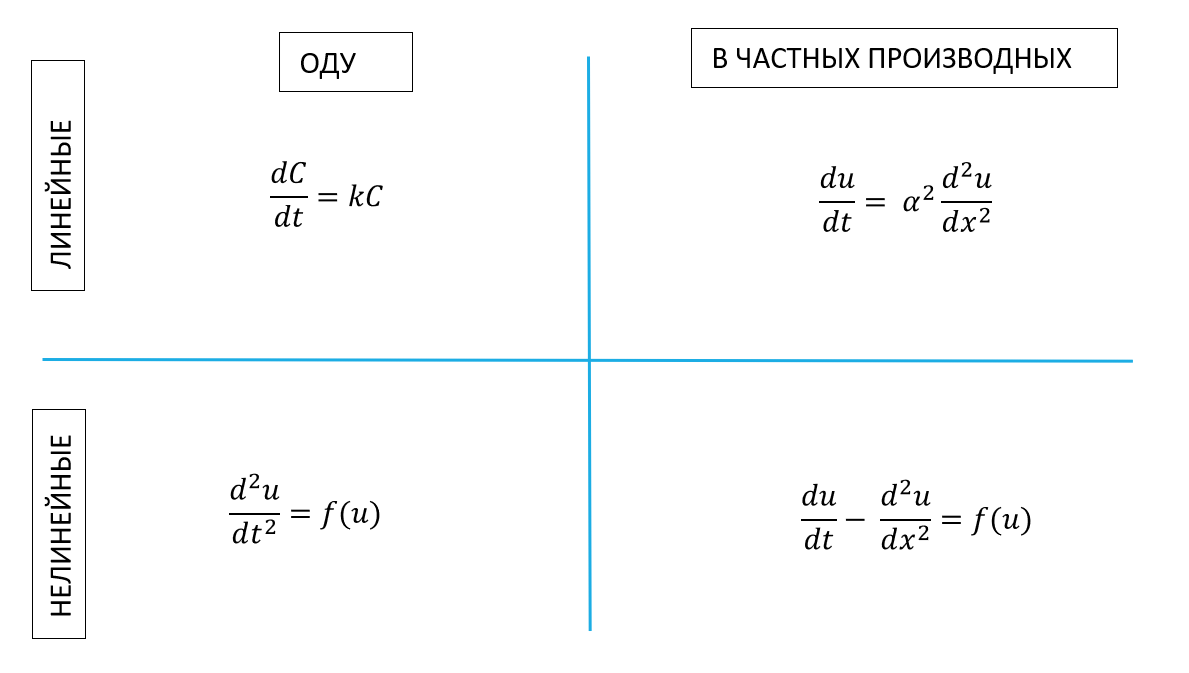

* Также выделяют некоторые типы дифференциальных уравнений
    - Системы дифференциальных уравнений
    - Автономные дифференциальные уравнения
    - Стохастические дифференциальные уравнения
    - Жесткие дифференциальные уравнеия
    - Дифференциальные уравнения с запаздывающим аргументом
    - Интегро-дифференциальные уравнения

**Необходимо помнить:**
Современные быстродействующие компьютеры эффективно дают численное решение дифференциальных уравнений, не требуя получения его решения в аналитическом виде. Это позволяет утверждать, что решение задачи получено, если её удалось свести к решению  дифференциального уравнения. 

**Обыкновенные дифференциальные уравнения (ОДУ)** — уравнения вида:

$$f(x,y,y',y'',\ldots,y^{(n)})=0,\qquad$$

где $y(x)$ — неизвестная функция, $n$ - порядок уравнения. 

При этом **автономным** уравнением (первого порядка) называется уравнение вида:

$$\frac{dy}{dx} = f(y) $$

правая часть $f(y)$ которого не зависит от $x$.

**Однородное дифференциальное уравнение**

Дифференциальное уравнение является однородным, если оно не содержит свободного члена — слагаемого, не зависящего от неизвестной функции:

$$f(y,y',y'',\ldots ,y^{(n)}) = 0$$ 

**Неоднородное дифференциальное уравнение** — дифференциальное уравнение (обыкновенное или в частных производных), которое содержит не равный тождественно нулю свободный член — слагаемое, не зависящее от неизвестных функций. 


$$f(y,y',y'',\ldots ,y^{(n)}) = g(x)$$ 


при $g(x)\neq 0$.

Дифференциальное уравнение называется **линейным**, если в нём функция и все её производные содержатся только в первой степени, и отсутствуют их произведения. 

**К примеру:**

Линейное дифференциальное уравнение первого порядка с переменными коэффициентами имеет общий вид:

$$y'(x)+f(x)y(x)=g(x)$$

**Нелинейное дифференциальное уравнение** - дифференциальное уравнение (обыкновенное или с частными производными), в которое по крайней мере одна из производных неизвестной функции (включая и производную нулевого порядка - саму неизвестную функцию) входит нелинейно. 



**Диффренциальные (линейные) уравнения с постоянными коэффициентам:**

Уравнения типа:

$$a_0y + a_1y' + a_2y'',\ldots , a_ny^{(n)} = 0,$$

где $a_0,\ldots , a_n$ - числа.


**Диффренциальные уравнения с переменными коэффициентам:**

Уравнения типа:

$$f_0(x)y + f_1(x)y' + f_2(x)y'',\ldots , f_n(x)y^{(n)} = 0,$$

где $f_0,\ldots , f_n$ - функции от $x$.

**Примеры ОДУ линейные**

* Линейное гомогенное обыкновенное ДУ первого порядка с постоянными коэфициентами  

$$\frac {du}{dx}+2u=0$$

* Линейное гомогенное обыкновенное ДУ второго порядка  с переменными коэффициентами

$$ {\frac {d^{2}u}{dx^{2}}}-x{\frac {du}{dx}}+u=0$$
        
        
* Линейное гомогенное обыкновенное ДУ второго порядка с постоянными коэффициентами

$${\frac {d^{2}u}{dx^{2}}}+\omega ^{2}u=0$$
        
        

* Линейное негомогенное обыкновенное ДУ 

$$ {\frac {du}{dx}}=cu+x^{2}$$



**Примеры ОДУ нелинейные**

* Нелинейное негомогенное обыкновенное ДУ 

$$ {\frac {du}{dx}}=u^{2}+4$$
        

* Нелинейное обыкновенное ДУ второго порядка

$$ L{\frac {d^{2}u}{dx^{2}}}+g\sin u=0$$

**Примеры ДУ в частных производных:**


* Линейное гомогенное ДУ в частных производных 

$$ \frac {\partial u}{\partial t} + t \frac {\partial u}{\partial x}=0$$

* Линейное  гомогенное ДУ в частных производных второго порядка

$$ {\frac {\partial ^{2}u}{\partial x^{2}}}+{\frac {\partial ^{2}u}{\partial y^{2}}}=0$$

* Нелинейное гомогенное ДУ в частных производных третьего порядка

$$ {\frac {\partial u}{\partial t}}=6u{\frac {\partial u}{\partial x}}-{\frac {\partial ^{3}u}{\partial x^{3}}}$$

## Основные способы решения
___

Начальной задачей или **задачей Коши** для обыкновенного дифференциального уравнения порядка $n$ называется задача отыскания решения этого уравнения, удовлетворяющего так называемым начальным условиям: $y(x_0) = y_0$, $y'(x_0) = y'_0$  и т.д. Т.е. отыскание функции проходящей через точку $x_0, y_0$.


**Общее решение дифференциального уравнения** - функция наиболее общего вида, которая при подстановке в дифференциальное уравнение вида $f(x,\;y,\;y',\;y'',\;\ldots ,\;y^{(n)})=0,$ обращает его в тождество. 


**Частным решением дифференциального уравнения**  называется решение  при фиксированных значениях постоянных $С$.

### Метод разделения переменных

Дифференциальным уравнением с **разделенными** переменными называется уравнение вида:

 $$ p(y)dy = q(x)dx \ (1)$$ 

в котором левая часть зависит только от одной переменной, а правая – только от другой.

И решается соответственно: 

$$\int p(y)dy = \int q(x)dx$$

Дифференциальным уравнением с **разделяющимися** переменными называется уравнение, которое может быть записано в виде:

 $$y' = f(x) · g(x) \ (2)$$

1) Если в дифференциальном уравнении присутствует $y′$, то сначала следует заменить $y′$ на $\frac{dy}{dx}$


2) Разделить переменные, т. е. свести к уравнению с разделенными переменными. Для этого надо обе части данного уравнения умножить или разделить на такое выражение, чтобы в одну часть уравнения входила только одна переменная, а в другую – только другая переменная (Т.е. выполнить разделение переменных).


2) Проинтегрировать обе части полученного уравнения с разделенными переменными.


$NB!$ На 1 этапе, при делении обеих частей уравнения на выражения, содержащие переменные, могут быть потеряны решения, обращающие это выражение в ноль. Поэтому следует рассмотреть вопрос о существовании таких решений данного дифференциального уравнения.


**Решить уравнение:**

$$y' - x^2y = 2xy$$

* Выразим $y'$

$$y' = 2xy + x^2y $$

* Заменим $y′$ на $\frac{dy}{dx}$

$$\frac{dy}{dx} = 2xy + x^2y $$

* Заменим выполним разделение

$$\frac{dy}{dx} = y(2x + x^2) $$

Данное уравнение является уравнением с разделяющимися переменными, т. к. его удалось привести к уравнению
вида 2 , где можно считать $f(x) = 2x + x^2$, $g(x) = y$

$$\frac{1}{y}dy = (2x + x^2)dx $$

Проинтегрируем обе части полученного уравнения:

$$\int \frac{1}{y}dy = \int (2x + x^2)dx $$


$$ ln|y| = \frac{x^3}{3} + x^2 + C$$


Откуда


$$ y = С·e^{\frac{x^3}{3} + x^2}$$

### Метод Бернулли (введение двух функций)
___

Решение уравнений вида:

$$y' + p(x) y = f(x)$$

Решение этого уравнения  разыскивается в виде $y = u⋅v$, где $u = u(x)$, $v = v(x)$ – какие-то новые неизвестные функции от $x$.
Из равенства $y = u⋅v$ следует:

$$y' = u'v + v'u$$

Подставляя в уравнение $y' + p(x) y = f(x)$ вместо $y$ и $y′$ их выражения через $u$ и $v$ получают:

$$u'v + v'u + p(x)uv = f(x)$$

Преобразуем:

$$v(u' + p(x)u) + v'u= f(x)$$


В качестве функции $u(x)$ выберем одно из решений дифференциального уравнения:

$$u' + p(x)u = 0$$

После чего находится решение:

$$v'u= f(x)$$

Таким образом, с помощью подстановки  решение линейного дифференциального уравнения первого порядка относительно неизвестной функции $y(x)$ сводится к решению двух дифференциальных уравнений с разделяющимися переменными. 

**Пример**

$$y' + \frac{2}{x}y = x$$

Выполним подстановку:

$$u'v + v'u + \frac{2}{x}uv = x$$

Группируем:

$$v(u'  + \frac{2}{x}u) +  v'u = x$$

Подберем функцию $u$ так, чтобы выражение в скобках было равно нулю: $u'  + \frac{2}{x}u = 0$

Решаем полученное уравнение с разделяющимися переменными и находим функцию $u$, как его некоторое ненулевое
решение:

$$u'  + \frac{2}{x}u = 0$$

$$\frac{du}{dx} = -\frac{2}{x}u$$

$$\frac{du}{u} = -\frac{2}{x}dx$$

$$ln|u| = -2 ln|x| + ln|C|$$

$$u = \frac{C}{x^2}$$

Выберем наиболее удобную $C = 1$

Тогда, учитывая способ выбора функции $u(x)$ из уравнения выше имеем дифференциальное уравнение для нахождения второй неизвестной функции:

$$v'u = x$$

$$v'\frac{1}{x^2} = x$$

$$\frac{dv}{dx} = x^3$$

$$dv = x^3 dx$$

$$v = \frac{x^4}{4} + C$$

Общее решение таким образом получается:

$$y = \frac{1}{x^2}⋅(\frac{x^4}{4} + C)$$

### Метод вариации произвольной постоянной (метод Лагранжа)
___

1) Найти общее решение соответствующего линейного однородного уравнения, которое будет содержать произвольную постоянную $с$ 


2) Решение исходного неоднородного дифференциального уравнения следует искать в том же виде, что и решение соответствующего однородного уравнения, но заменив постоянную $с$ на функцию $с(x)$. Отыскав ее, находят общее решение данного линейного неоднородного уравнения.

**Пример:**

$$y' + y ⋅ cos(x) = e^{-sin(x)}$$

1) Решаем соответствующее однородное уравнение

$$y' + y ⋅ cos(x) = 0$$

$$\frac{dy}{dx}  = - y ⋅ cos(x)$$

$$\frac{dy}{y}  = - cos(x)dx$$

$$ln|y|  = - sin(x) + C$$

$$y  = e^{- sin(x) + C} = C⋅e^{- sin(x)}$$

2) Решение исходного неоднородного дифференциального уравнения будем искать в том же виде, что и решение  соответствующего однородного дифференциального уравнения, только заменяя постоянную $C$ на функцию $c(x)$:

$$y = c(x)⋅e^{- sin(x)}$$

Дифференцируем по $x$ для того что бы получить $y'$

$$y' = (c(x)⋅e^{- sin(x)})' = c'(x)⋅e^{- sin(x)} - c(x)⋅cos(x)⋅e^{- sin(x)}$$


Подставим $y$ и $y′$ в исходное уравнение:

$$c'(x)⋅e^{- sin(x)} - c(x)⋅cos(x)⋅e^{- sin(x)} + c(x)⋅e^{- sin(x)} ⋅ cos(x) = e^{-sin(x)}$$

Сокращаем на $e^{-sin(x)}$

$$c'(x) - c(x)⋅cos(x) + c(x)⋅cos(x) = 1$$

$$c'(x) = 1$$

Решаем:

$$с(x) = x + C$$

Подставляем  $с(x) = x + C$ в $y = c(x)⋅e^{- sin(x)}$:

$$y =  (x + C)⋅e^{- sin(x)}$$

Это и есть ответ.

**Модель роста и отмирания биомассы**

* Модель Андрюса
* Модель Рамкришны

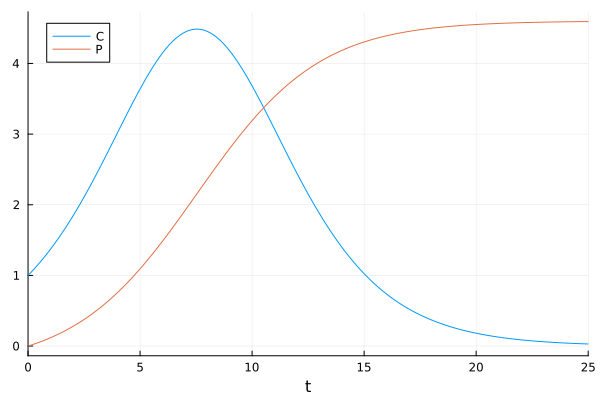

In [5]:
using DifferentialEquations, Plots
# Модель
#=
C - биомасса
P - продукты жизнедеятельности
S - концентрация субстрата
μ - константа
Ks, Ki - константы стимулирования / ингибирования
ke - константа отмирания
kp - константа продукции 
=#
function biom(du, u, p, t)
    if u[1] <= 0 u[1] = 0 end
    
    μ, S, Ks, Ki, ke, kp  = p
    C, P       = u
    
    du[1] =  μ * S * C / (Ks + S + S^2 / Ki) - ke * P * C
    du[2] =  kp * C
end
# Начальные условия
u0 = [1.0; 0.0]
# Параметры
p  = [1.3, 0.05, 0.15, 2.5, 0.15, 0.1]
# Отрезок времени
tspan = (0.0, 25.0)
# Задача
prob = ODEProblem(biom, u0, tspan, p)
# Решение
sol = solve(prob)
# График
plot(sol; label = ["C" "P"])

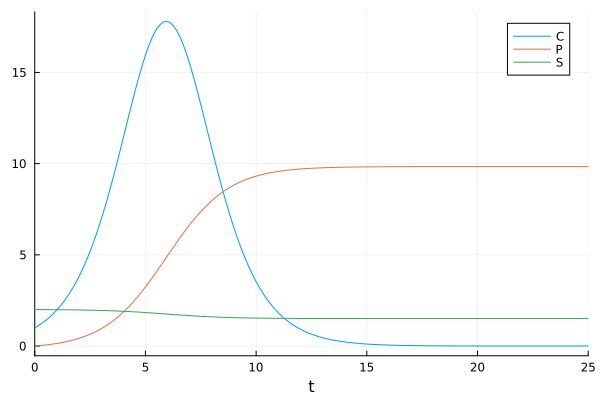

In [6]:
# Модель
#=
C - биомасса
P - продукты жизнедеятельности
S - концентрация субстрата
μ - константа
Ks, Ki - константы стимулирования / ингибирования
ke - константа отмирания
kp - константа продукции 
kc - константа скорости потребления субстрата
=#
function biom(du, u, p, t)
    if u[1] <= 0 u[1] = 0 end
    if u[2] <= 0 u[2] = 0 end
    if u[3] <= 0 u[3] = 0 end
    
    μ, kc, Ks, Ki, ke, kp  = p
    C, P, S       = u
    
    du[1] =  μ * S * C / (Ks + S + S^2 / Ki) - ke * P * C
    du[2] =  kp * C
    du[3] =  -kc * C
end
# Начальные условия
u0 = [1.0, 0.0, 2.0]
# Параметры
p  = [1.3, 0.005, 0.15, 2.5, 0.15, 0.1]
# Отрезок времени
tspan = (0.0, 25.0)
# Задача
prob = ODEProblem(biom, u0, tspan, p)
# Решение
sol = solve(prob)
# График
plot(sol; label = ["C" "P" "S"])

**A Novel Integrated Pharmacokinetic-Pharmacodynamic
Model to Evaluate Combination Therapy and Determine
In Vivo Synergism**

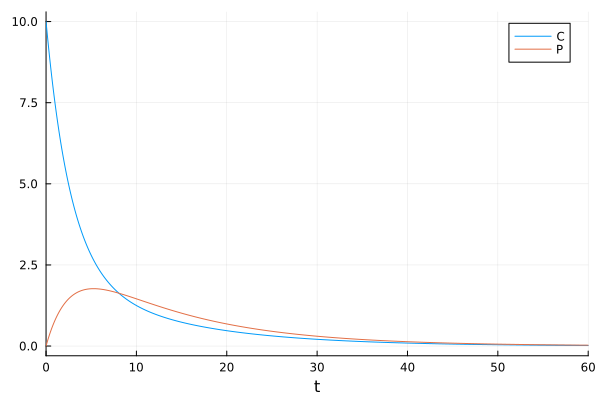

In [7]:

# Модель 1, eq 1, 2
function pkiv(du, u, p, t)
    kₑ, k₁₂, k₂₁ = p
    Xc, Xp       = u
    du[1] =  - k₁₂ * Xc - kₑ * Xc + k₂₁ * Xp 
    du[2] =  k₁₂ * Xc - k₂₁ * Xp
end
# Начальные условия
u0 = [10.0;0.0]
# Параметры
p  = [0.2, 0.1, 0.15]
# Отрезок времени
tspan = (0.0, 60.0)
# Задача
prob = ODEProblem(pkiv, u0, tspan, p)
# Решение
sol = solve(prob)
# График
plot(sol; label = ["C" "P"])

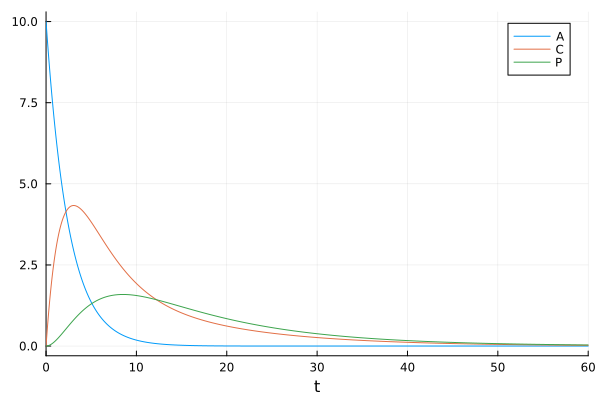

In [8]:
using DifferentialEquations, Plots
# Модель 2, eq 3, 4, 5
function pkev(du, u, p, t)
    kₐ, kₑ, k₁₂,k₂₁  = p
    A, Xc, Xp        = u
    du[1] = - kₐ * A
    du[2] =  kₐ * A - k₁₂ * Xc - kₑ * Xc + k₂₁ * Xp 
    du[3] =  k₁₂ * Xc - k₂₁ * Xp
end
# Начальные условия
u0 = [10.0, 0.0, 0.0]
# Параметры
p  = [0.4, 0.2, 0.1, 0.15]
# Отрезок времени
tspan = (0.0, 60.0)
# Задача
prob = ODEProblem(pkev, u0, tspan, p)
# Решение
sol = solve(prob)
# График
plot(sol; label = ["A" "C" "P"])

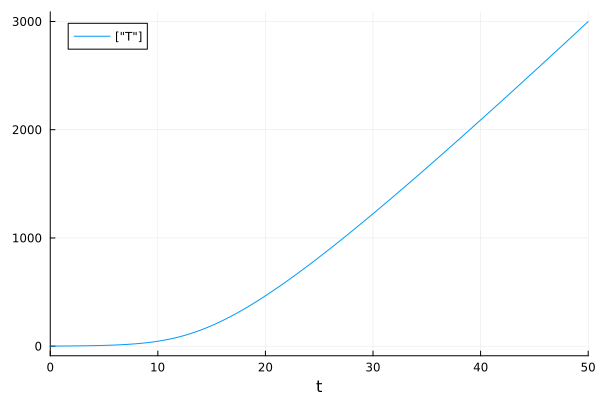

In [9]:
# Модель 3, eq 6,7
function pd(du, u, p, t)
    L₀, L₁  = p
    x₁      = u[1]
    du[1] = 2L₀ * L₁ * x₁/(L₁ + 2L₀ * x₁)
end
# Начальные условия
u0 = [1.0]
# Параметры
p  = [0.2, 100.0]
# Отрезок времени
tspan = (0.0, 50.0)
# Задача
prob = ODEProblem(pd, u0, tspan, p)
# Решение
sol = solve(prob)
# График
plot(sol; label = ["T"])

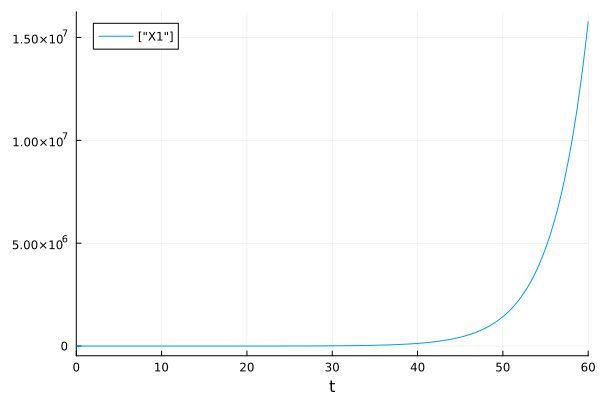

In [10]:
# Модель 4, eq 8-11
using Sundials
function pd(du, u, p, t)
    L₀, L₁, ω = p
    x₁    = u[1]
    du[1] = 2L₀*L₁*x₁^2/(L₁+L₀*x₁)/ω
end
ω₀ = 10.0           # Начальные условия
u0 = [ω₀]
p  = [2.0, 3., 25]  # Параметры
tspan = (0.0, 60.0) # Отрезок времени
# Задача
prob = ODEProblem(pd, u0, tspan, p)
# Решение
sol = solve(prob, CVODE_BDF())
# График
plot(sol; label = ["X1"])

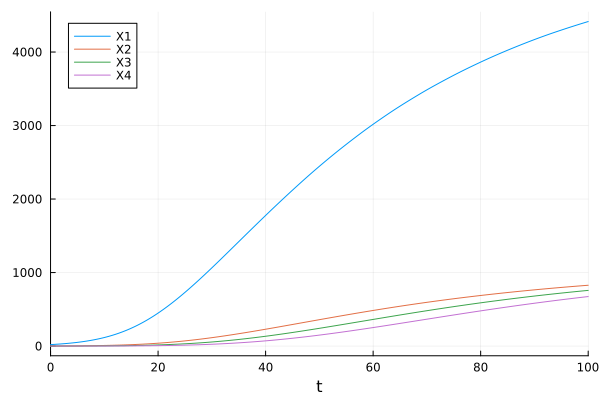

In [11]:
# Модель 4, eq 8-11
function pd(du, u, p, t)
    L₀, L₁, ω, κ₁, κ₂, C = p
    x₁, x₂, x₃, x₄       = u
    ω = x₁ + x₂ + x₃ + x₄
    du[1] = (2L₀ * L₁ * x₁^2)/(L₁+2L₀*x₁)/ω - κ₂ * C * x₁
    du[2] = κ₂ * C * x₁ - κ₁ * x₂
    du[3] = κ₁ * x₂ - κ₁ * x₃
    du[4] = κ₁ * x₃ - κ₁ * x₄
end
ω₀ = 20.0
u0 = [ω₀, 0.0, 0.0, 0.0]            # Начальные условия
p  = [0.11, 200., 25.0, 0.1, 0.2, 0.1] # Параметры
tspan = (0.0, 100.0)                # Отрезок времени
# Задача
prob = ODEProblem(pd, u0, tspan, p)
# Решение
sol = solve(prob, CVODE_BDF())
# График
plot(sol; label = ["X1" "X2" "X3" "X4"])

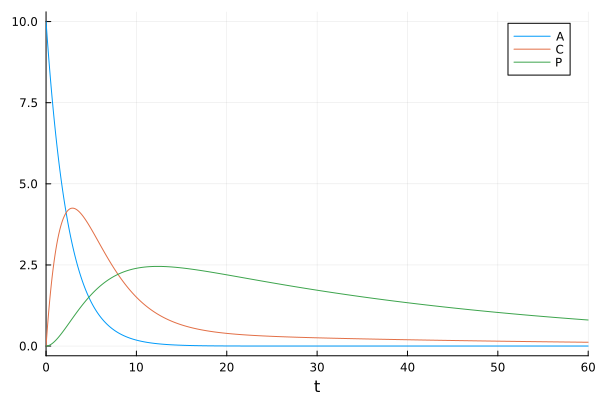

In [12]:
# Модель 4, eq 15-18
function pkev(du, u, p, t)
    kₐ, kₑ, k₁₂,k₂₁  = p
    A, Xc, Xp        = u
    du[1] = - kₐ * A
    du[2] =  kₐ * A - k₁₂ * Xc - kₑ * Xc + k₂₁ * Xp 
    du[3] =  k₁₂ * Xc - k₂₁ * Xp
end
u0 = [10.0, 0.0, 0.0]      # Начальные условия
p  = [0.4, 0.2, 0.1, 0.04] # Параметры
tspan = (0.0, 60.0)        # Отрезок времени
# Задача
prob = ODEProblem(pkev, u0, tspan, p)
# Решение
pkevsol = solve(prob)
pk_sol_f(x) = pkevsol(x)[3]
plot(pkevsol; label = ["A" "C" "P"])

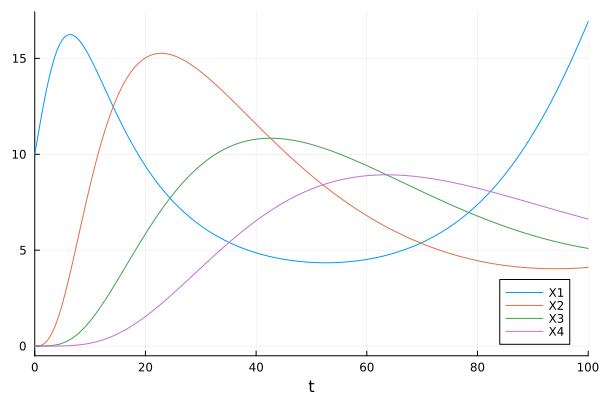

In [13]:
# Модель 4, eq 15-18
function pd(du, u, p, t)
    L₀, L₁, ω, κ₁, κ₂    = p
    C = pk_sol_f(t)
    x₁, x₂, x₃, x₄       = u
    ω = x₁ + x₂ + x₃ + x₄
    du[1] = (2L₀*L₁*x₁^2)/(L₁+2L₀*x₁)/ω - κ₂ * C * x₁
    du[2] = κ₂ * C * x₁ - κ₁ * x₂
    du[3] = κ₁ * x₂ - κ₁ * x₃
    du[4] = κ₁ * x₃ - κ₁ * x₄
end
ω₀ = 10.0
u0 = [ω₀, 0.0, 0.0, 0.0]           # Начальные условия
p  = [0.5, 2., 25.0, 0.05, 0.045]  # Параметры
tspan = (0.0, 100.0)               # Отрезок времени
# Задача
prob = ODEProblem(pd, u0, tspan, p)
# Решение
sol = solve(prob, CVODE_BDF())
# График
plot(sol; label = ["X1" "X2" "X3" "X4"])


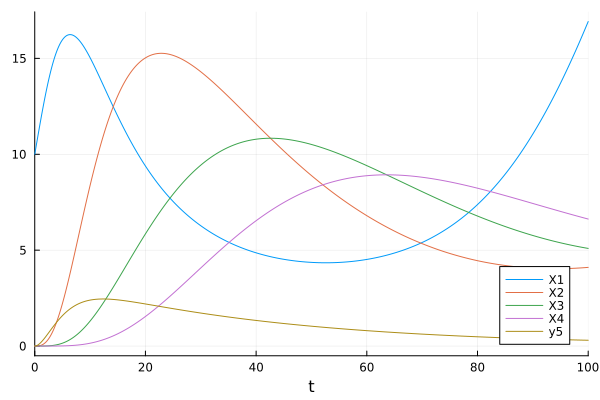

In [14]:
plot!(pk_sol_f)